## Logistic Regression

Logistic regression is a simple machine learning algorithm for classification.
One way to look at it, is as a single neuron that computes the weighted sum of its inputs and outputs an *activation* that turns the weighted sum into a probability.
In this toy example we are going to use it to decide, to which of two distributions a data point belongs.

### Setup

For a detailed explanation of the used modules, please refer to the respective sections in the [introductory notebook](0_MNIST_dataset.ipynb).

In [3]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(842424)

### Generation of Artificial Data

asd

In [4]:
def generate_data(n_samples=1000, input_dim=2):
    """
    """
    half_samples = n_samples // 2
    
    # generate the blobs
    x1 = np.random.normal(1., 0.25, size=(half_samples, input_dim))
    x2 = np.random.normal(2., 0.30, size=(half_samples, input_dim))
    
    # create matching labels
    y1 = np.zeros(half_samples)
    y2 = np.ones(half_samples)
    
    return np.concatenate((x1, x2)), np.concatenate((y1, y2))

data, labels = generate_data()
data.shape, labels.shape

((1000, 2), (1000,))

asd

In [5]:
shuffled_indices = np.arange(data.shape[0])
np.random.shuffle(shuffled_indices)

data, labels = data[shuffled_indices], labels[shuffled_indices]

asd

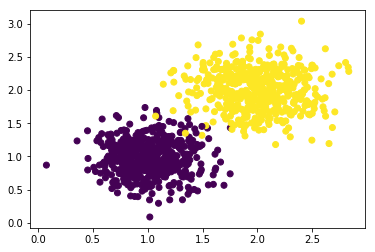

In [6]:
def plot_data(data, labels):
    plt.scatter(data[:, 0], data[:, 1], c=labels)
    plt.show()
    
plot_data(data, labels)

### The Logistic Function
The logistic (or sigmoid) function gives the predicted probability of the tested hypothesis being true.
In our case: does the input belong to the yellow distribution?

$$\sigma(z) = \frac{1}{1 + \text{e}^{-z}}$$

The activation function of a neuron is applied to the dot product of the weights of the model and the input.
To optimize the model with a gradient descent optimizer, the activation function has to be differentiable.

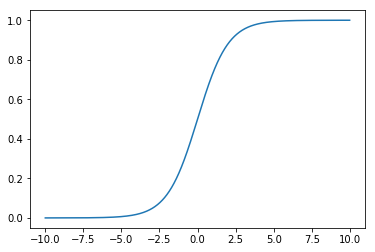

In [7]:
def sigmoid(z):
    """Return the sigmoid of input z."""
    return 1.0 / (1.0 + np.exp(-z))

def plot_sigmoid():
    plot_range = np.arange(-10, 10, 0.01)
    plt.plot(plot_range, sigmoid(plot_range))
    plt.show()
    
plot_sigmoid()

### Logistic Regression Model

asd

In [8]:
def lr_predict(weights, x):
    """Return the prediction of the model for input x with the given weights."""
    return sigmoid(np.dot(x, weights))

weights = np.random.rand(data.shape[1] + 1)
weights

#TODO lr_predict + plot

array([0.3161895 , 0.34369278, 0.79880531])

### The Loss Function

The loss function measures how well the model performs. If the model predicts all samples correctly it would be 0.
For classification cross-entropy loss is usually used.
Here we use Mean Squared Error:

$$ MSE(\textrm{samples}) = \frac{1}{2 |\textrm{samples}|} \sum_{x \in \textrm{samples}} \left(y(x) - y_{\textrm{label}}\right)^2$$

To minimize the loss, we also compute the gradient w.r.t. a single weight.

$$ \nabla = (y(\vec{x}) - y_{\textrm{label}}) \cdot y(\vec{x})^2 \cdot \textrm{e}^{-\vec{w} \cdot \vec{x}} \cdot \vec{x}$$

where the weight vector is $\vec{w}$ with the bias $w_0$.

In [9]:
def lr_loss(weights, x, labels):
    """Return the loss and the gradient with respect to the weights."""
    loss = 0.
    features = x.shape[0]
    
    y = lr_predict(weights, x)
    
    loss = (y - labels) ** 2 / 2
    gradient = (y - labels) * y ** 2 * np.exp(-np.dot(weights, x)) * x
    
    return loss, gradient

lr_loss(weights, np.concatenate([[1], data[0]]), labels[0])

(0.0022561783625117187, array([-0.00420924, -0.00852267, -0.0085304 ]))

### Training the Model Manually
To train the model, we first initialize the weights (plus bias) and compute the corresponding loss.
To comfortably incorporate the bias, prepend $x_0 = 1$ to the input data so you can just compute the dot product in the functions above.
We then update the weights with the gradient of the loss, until the model converges.
Since loss is not a very intuitable quantity, we also print the accuracy (percentage of correctly classified samples).

In [10]:
def lr_train(weights, x, labels, epochs=100, lr=0.001):
    """
    Train the model, i.e. update the weights following the negative gradient until the model converges.
    """
    n_samples = x.shape[0]
    ones = np.ones((n_samples, 1,))
    x = np.hstack([ones, x])
    
    for epoch in range(epochs):
        loss_sum = 0.0
        accuracy = 0.0
        
        for n in range(n_samples):
            loss, gradient = lr_loss(weights, x[n], labels[n])
            loss_sum += loss
            
            if int(lr_predict(weights, x[n]) + 0.5) == labels[n]:
                accuracy += 1.0
            weights -= lr * gradient

        loss_sum /= n_samples
        accuracy /= n_samples
        accuracy *= 100
        
        # print every tenth epoch the training status
        if epoch % 10 == 0:
            print('Epoch: {:2}, Loss: {:.5f}, Accuracy: {}'.format(epoch, loss_sum, accuracy))
            
    return weights

weights = lr_train(weights, data, labels)

Epoch:  0, Loss: 0.15957, Accuracy: 50.0
Epoch: 10, Loss: 0.10560, Accuracy: 51.0
Epoch: 20, Loss: 0.09602, Accuracy: 64.5
Epoch: 30, Loss: 0.08766, Accuracy: 78.0
Epoch: 40, Loss: 0.08030, Accuracy: 87.2
Epoch: 50, Loss: 0.07386, Accuracy: 92.80000000000001
Epoch: 60, Loss: 0.06824, Accuracy: 94.8
Epoch: 70, Loss: 0.06331, Accuracy: 97.0
Epoch: 80, Loss: 0.05899, Accuracy: 97.6
Epoch: 90, Loss: 0.05519, Accuracy: 97.89999999999999


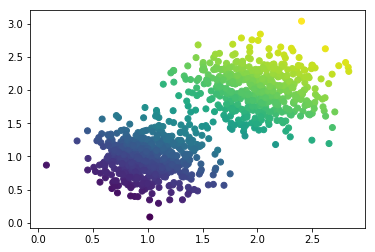

In [11]:
ones = np.ones((data.shape[0], 1,))
plot_data(data, lr_predict(weights, np.hstack([ones, data])))

### Keras
Building a model can often be simplified with a high level API like Keras.
Our simple model in the Keras vocabulary is defined as a $\texttt{Sequential}$ model with a single $\texttt{Dense}$ layer 
with a sigmoid activation function.

It is then "compiled" with a stochastic gradient descent optimizer and an mse loss.
These parameters can be given by keyword or custom objects. E.g. here the default learning rate of the SGD optimizer is too slow for this simple demonstration.

The training is done with the $\texttt{fit}$ method.


The simplest model in Keras is $\texttt{Sequential}$, a linear stack of layers. The layers can be passed to the constructor as a list, or $\texttt{add}$ed later.

The $\texttt{Dense}$ layer encodes:
$$ f(W \cdot x)$$
where $W \in \mathbb{R}^{\text{output_dim x 1+input_dim}}$, x = (1, $\textrm{input}_1$, .. , $\textrm{input}_{\textrm{input_dim}}$) and f applies the activation function to each element in the resulting vector.
In short: every output is connected to every input plus a bias.

Keras also always uses minibatches by default. Why?

In [12]:
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD

asd

In [13]:
def build_model(data):
    model = Sequential()
    model.add(Dense(1, input_dim=data.shape[1], activation='sigmoid'))
    
    model.compile(optimizer=SGD(lr=0.05), loss='mse', metrics=['accuracy'])
    
    return model

model = build_model(data)

asd

In [15]:
def train_model(model, data, labels, epochs=100, batch_size=50):
    model.fit(data, labels, batch_size=batch_size, epochs=epochs)
    
train_model(model, data, labels)

Epoch 1/100
1000/1000 [==============================] - 0s 72us/step - loss: 0.4220 - acc: 0.5000
Epoch 2/100
1000/1000 [==============================] - 0s 14us/step - loss: 0.3695 - acc: 0.5000
Epoch 3/100
1000/1000 [==============================] - 0s 18us/step - loss: 0.2967 - acc: 0.4930
Epoch 4/100
1000/1000 [==============================] - 0s 14us/step - loss: 0.2530 - acc: 0.4030
Epoch 5/100
1000/1000 [==============================] - 0s 19us/step - loss: 0.2386 - acc: 0.5000
Epoch 6/100
1000/1000 [==============================] - 0s 23us/step - loss: 0.2323 - acc: 0.5000
Epoch 7/100
1000/1000 [==============================] - 0s 21us/step - loss: 0.2274 - acc: 0.5000
Epoch 8/100
1000/1000 [==============================] - 0s 15us/step - loss: 0.2231 - acc: 0.5000
Epoch 9/100
1000/1000 [==============================] - 0s 20us/step - loss: 0.2188 - acc: 0.5000
Epoch 10/100
1000/1000 [==============================] - 0s 24us/step - loss: 0.2147 - acc: 0.5010
Epoch 11/

1000/1000 [==============================] - 0s 15us/step - loss: 0.0778 - acc: 0.9890
Epoch 84/100
1000/1000 [==============================] - 0s 18us/step - loss: 0.0771 - acc: 0.9880
Epoch 85/100
1000/1000 [==============================] - 0s 20us/step - loss: 0.0764 - acc: 0.9880
Epoch 86/100
1000/1000 [==============================] - 0s 19us/step - loss: 0.0758 - acc: 0.9880
Epoch 87/100
1000/1000 [==============================] - 0s 19us/step - loss: 0.0751 - acc: 0.9880
Epoch 88/100
1000/1000 [==============================] - 0s 16us/step - loss: 0.0745 - acc: 0.9880
Epoch 89/100
1000/1000 [==============================] - 0s 16us/step - loss: 0.0738 - acc: 0.9900
Epoch 90/100
1000/1000 [==============================] - 0s 15us/step - loss: 0.0732 - acc: 0.9890
Epoch 91/100
1000/1000 [==============================] - 0s 16us/step - loss: 0.0726 - acc: 0.9900
Epoch 92/100
1000/1000 [==============================] - 0s 16us/step - loss: 0.0720 - acc: 0.9900
Epoch 93/100


asd

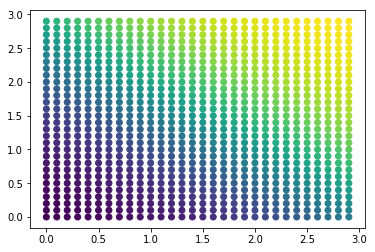

In [37]:
def plot_prediction_grid(model, grid_size=30):
    x_coord = np.zeros((grid_size, grid_size))
    y_coord = np.zeros((grid_size, grid_size))
    
    for i in range(grid_size):
        for j in range(grid_size):
            x_coord[i, j] = i / 10.0
            y_coord[i, j] = j / 10.0
            
    x_coord = x_coord.reshape(-1, 1)
    y_coord = y_coord.reshape(-1, 1)    
    
    prediction = model.predict(np.hstack([x_coord, y_coord]))
    plt.scatter(x_coord.flatten(), y_coord.flatten(), c=prediction.flatten())
    plt.show()

plot_prediction_grid(model)

In [41]:
#plt.scatter(*zip(*xs), c=model.predict(xs, batchSize).reshape(n_samples, ))
print(data.shape)
plot_data(data[:, model.predict(data))

(1000, 2) (1000, 1)


### Bonus:
Why is a simple logistic regression not the optimal solution for this task?

What is the property required of an actual model solution?